In [1]:
import pandas as pd
import requests
import yfinance as yf

In [284]:
stock = yf.Ticker('AAPL') # example
# stock.news
# stock.income_stmt
# stock.balance_sheet

AttributeError: 'Ticker' object has no attribute 'close_price'

In [285]:
apple = yf.Ticker("AAPL")
hist = apple.history(period="1y")

In [286]:
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-10-16 00:00:00-04:00,175.850148,178.168287,175.611364,177.810120,52517000,0.0,0.0
2023-10-17 00:00:00-04:00,175.750653,177.511646,173.910081,176.248108,57549400,0.0,0.0
2023-10-18 00:00:00-04:00,174.686108,176.675925,174.218499,174.944778,54764400,0.0,0.0
2023-10-19 00:00:00-04:00,175.143776,176.934615,174.298112,174.566742,59302900,0.0,0.0
2023-10-20 00:00:00-04:00,174.417469,174.526909,171.761064,171.999847,64189300,0.0,0.0
...,...,...,...,...,...,...,...
2024-10-09 00:00:00-04:00,225.229996,229.750000,224.830002,229.539993,33591100,0.0,0.0
2024-10-10 00:00:00-04:00,227.779999,229.500000,227.169998,229.039993,28183500,0.0,0.0
2024-10-11 00:00:00-04:00,229.300003,229.410004,227.339996,227.550003,31759200,0.0,0.0


## Select feature

### cash flow

In [31]:
stock.cashflow.T

,Free Cash Flow,Repurchase Of Capital Stock,Repayment Of Debt,Issuance Of Debt,Issuance Of Capital Stock,Capital Expenditure,Interest Paid Supplemental Data,Income Tax Paid Supplemental Data,End Cash Position,Beginning Cash Position,...,Change In Inventory,Change In Receivables,Changes In Account Receivables,Other Non Cash Items,Stock Based Compensation,Deferred Tax,Deferred Income Tax,Depreciation Amortization Depletion,Depreciation And Amortization,Net Income From Continuing Operations
2023-09-30,99584000000.0,-77550000000.0,-11151000000.0,5228000000.0,NaN,-10959000000.0,3803000000.0,18679000000.0,30737000000.0,24977000000.0,...,-1618000000.0,-417000000.0,-1688000000.0,-2227000000.0,10833000000.0,NaN,NaN,11519000000.0,11519000000.0,96995000000.0
2022-09-30,111443000000.0,-89402000000.0,-9543000000.0,5465000000.0,NaN,-10708000000.0,2865000000.0,19573000000.0,24977000000.0,35929000000.0,...,1484000000.0,-9343000000.0,-1823000000.0,1006000000.0,9038000000.0,895000000.0,895000000.0,11104000000.0,11104000000.0,99803000000.0
2021-09-30,92953000000.0,-85971000000.0,-8750000000.0,20393000000.0,1105000000.0,-11085000000.0,2687000000.0,25385000000.0,35929000000.0,39789000000.0,...,-2642000000.0,-14028000000.0,-10125000000.0,-4921000000.0,7906000000.0,-4774000000.0,-4774000000.0,11284000000.0,11284000000.0,94680000000.0
2020-09-30,73365000000.0,-72358000000.0,-12629000000.0,16091000000.0,880000000.0,-7309000000.0,3002000000.0,9501000000.0,39789000000.0,50224000000.0,...,-127000000.0,8470000000.0,6917000000.0,-97000000.0,6829000000.0,-215000000.0,-215000000.0,11056000000.0,11056000000.0,57411000000.0


In [322]:
cashflow_relevant_indexes = [
    'Free Cash Flow',
    'Repayment Of Debt',
    # 'Issuance Of Debt',
    # 'Capital Expenditure',
    # 'Changes In Cash',
    # 'Financing Cash Flow',
    'Net Short Term Debt Issuance',
    'Operating Cash Flow'
]

In [40]:
df_cashflow = stock.cashflow.T # transpose
df_cashflow = df_cashflow[cashflow_relevant_indexes] #filter relevant indexs
df_cashflow = pd.DataFrame(df_cashflow.mean(axis = 0)).T
df_cashflow

,Free Cash Flow,Repayment Of Debt,Issuance Of Debt,Capital Expenditure,Interest Paid Supplemental Data,Income Tax Paid Supplemental Data,Changes In Cash,Financing Cash Flow,Net Short Term Debt Issuance,Net Long Term Debt Issuance,Operating Cash Flow,Change In Working Capital,Change In Inventory,Change In Receivables
0,9.433625e+10,-1.051825e+10,1.179425e+10,-1.001525e+10,3.089250e+09,1.828450e+10,-4.871750e+09,-9.985250e+10,9000000.0,1.276000e+09,1.043515e+11,-1.149500e+09,-725750000.0,-3.829500e+09


### blance sheet

In [ ]:
stock.balance_sheet.index

In [324]:
balance_sheet_relevant_indexes = [
    'Net Debt',                        # Summarizes debt after accounting for cash.
    'Tangible Book Value',             # Provides the value of tangible assets, excluding intangibles.
    'Working Capital',                 # Reflects liquidity and short-term financial health.
    'Common Stock Equity',             # Represents shareholder equity, important for financial stability.
    # 'Total Capitalization',            # Gives a full picture of the company's capital structure (debt + equity).
    'Stockholders Equity',             # Reflects the overall value attributable to shareholders.
    # 'Total Liabilities Net Minority Interest',  # Focuses on total liabilities, crucial for understanding debt exposure.
    'Long Term Debt',                  # Key indicator of long-term financial risk.
    'Current Liabilities',             # Indicates short-term financial obligations, impacting liquidity.
    'Payables And Accrued Expenses',   # Shows operational liabilities, impacting short-term liquidity.
    'Total Assets',                    # Reflects the company's total resources and overall stability.
    # 'Net PPE',                         # Provides the value of physical assets, crucial for long-term solvency.
    # 'Receivables',                     # Key indicator of liquidity and credit risk.
    'Cash And Cash Equivalents'        # Measures immediate liquidity and the ability to cover short-term obligations.
]

In [44]:
df_balance_sheet = stock.balance_sheet.T # transpose
df_balance_sheet = df_balance_sheet[balance_sheet_relevant_indexes] #filter relevant indexs
df_balance_sheet = pd.DataFrame(df_balance_sheet.mean(axis = 0)).T
df_balance_sheet

,Net Debt,Tangible Book Value,Working Capital,Common Stock Equity,Total Capitalization,Stockholders Equity,Total Liabilities Net Minority Interest,Long Term Debt,Current Liabilities,Payables And Accrued Expenses,Total Assets,Net PPE,Receivables,Cash And Cash Equivalents
0,8.543625e+10,6.031175e+10,6.839250e+09,6.031175e+10,1.608150e+11,6.031175e+10,2.847452e+11,1.005032e+11,1.325408e+11,5.978900e+10,3.450570e+11,5.044325e+10,5.271700e+10,3.164175e+10


### income_stmt

In [46]:
stock.income_stmt.index

Index(['Tax Effect Of Unusual Items', 'Tax Rate For Calcs',
       'Normalized EBITDA',
       'Net Income From Continuing Operation Net Minority Interest',
       'Reconciled Depreciation', 'Reconciled Cost Of Revenue', 'EBITDA',
       'EBIT', 'Net Interest Income', 'Interest Expense', 'Interest Income',
       'Normalized Income',
       'Net Income From Continuing And Discontinued Operation',
       'Total Expenses', 'Total Operating Income As Reported',
       'Diluted Average Shares', 'Basic Average Shares', 'Diluted EPS',
       'Basic EPS', 'Diluted NI Availto Com Stockholders',
       'Net Income Common Stockholders', 'Net Income',
       'Net Income Including Noncontrolling Interests',
       'Net Income Continuous Operations', 'Tax Provision', 'Pretax Income',
       'Other Income Expense', 'Other Non Operating Income Expenses',
       'Net Non Operating Interest Income Expense',
       'Interest Expense Non Operating', 'Interest Income Non Operating',
       'Operating Inco

In [341]:
income_stmt_relevant_indexes = [
    'EBITDA',                       # Reflects core operating profitability, key for assessing financial stability.
    'EBIT',                         # Measures operating profit, which can highlight volatility in earnings.
    'Net Income',                   # Provides a bottom-line view of profitability, linked to stock price stability.
    'Total Revenue',                # High volatility in revenue can lead to stock price fluctuations.
    # 'Gross Profit',                 # Indicates profitability after direct costs, critical for understanding margins.
    # 'Operating Income',             # Represents the profit from operations, key for assessing operational risk.
    # 'Operating Expense',            # High or fluctuating expenses can indicate risk in operational efficiency.
    # 'Interest Expense',             # Shows the cost of borrowing, which can affect financial risk if interest expenses are high.
    # 'Net Interest Income',          # Important for companies where interest income significantly impacts profitability.
    'Cost Of Revenue',              # Reflects the direct costs related to revenue, key for evaluating margins.
    # 'Research And Development',     # High R&D spending can indicate volatility, especially for tech companies.
    # 'Selling General And Administration',  # Significant variations here can indicate operational inefficiency or volatility.
    # 'Tax Provision',                # Changes in tax provision can impact net income volatility.
    # 'Pretax Income',                # Represents income before tax, providing insight into operational stability.
    # 'Other Income Expense',         # Fluctuations here can contribute to overall earnings volatility.
    'Total Expenses'                # Provides a comprehensive view of the company's cost structure.
]

In [49]:
df_income_stmt = stock.income_stmt.T # transpose
df_income_stmt = df_income_stmt[income_stmt_relevant_indexes] #filter relevant indexs
df_income_stmt = pd.DataFrame(df_income_stmt.mean(axis = 0)).T
df_income_stmt

,EBITDA,EBIT,Net Income,Total Revenue,Gross Profit,Operating Income,Operating Expense,Interest Expense,Net Interest Income,Cost Of Revenue,Research And Development,Selling General And Administration,Tax Provision,Pretax Income,Other Income Expense,Total Expenses
0,1.166205e+11,1.053798e+11,8.722225e+10,3.544862e+11,1.494305e+11,1.022438e+11,4.718675e+10,3.095500e+09,199750000.0,2.050558e+11,2.420800e+10,2.297875e+10,1.506200e+10,1.022842e+11,-159250000.0,2.522425e+11


### hist

In [319]:
df_hist = stock.history(period="4mo")
df_hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-06-17 00:00:00-04:00,213.123307,218.696857,212.474064,216.419495,93728300,0.0,0.0
2024-06-18 00:00:00-04:00,217.338424,218.377230,212.753735,214.042236,79943300,0.0,0.0
2024-06-20 00:00:00-04:00,213.682663,213.992317,208.608549,209.437576,86172500,0.0,0.0
2024-06-21 00:00:00-04:00,210.146763,211.645029,206.870557,207.250122,246421400,0.0,0.0
2024-06-24 00:00:00-04:00,207.479840,212.454078,206.351142,207.899353,80727000,0.0,0.0
...,...,...,...,...,...,...,...
2024-10-10 00:00:00-04:00,227.779999,229.500000,227.169998,229.039993,28183500,0.0,0.0
2024-10-11 00:00:00-04:00,229.300003,229.410004,227.339996,227.550003,31759200,0.0,0.0
2024-10-14 00:00:00-04:00,228.699997,231.729996,228.600006,231.300003,39882100,0.0,0.0


In [320]:
hist_relevant_indexes = ['Open', 'High', 'Low', 'Close', 'Volume']

## concat

In [ ]:
df_income_stmt
df_balance_sheet
df_cashflow

## stocks

In [304]:
stocks = pd.read_csv("stock_details_5_years.csv")
stocks.Company[:20]

0      AAPL
1      MSFT
2     GOOGL
3      AMZN
4      NVDA
5      META
6      TSLA
7       LLY
8         V
9       TSM
10      UNH
11     AVGO
12      NVO
13      JPM
14      WMT
15      XOM
16       MA
17      JNJ
18       PG
19     ORCL
Name: Company, dtype: object

In [326]:
def get_feature(stock_name):
    stock = yf.Ticker(stock_name)

    df_hist = stock.history(period="4mo")
    df_hist = df_hist.reindex(columns=hist_relevant_indexes)
    df_hist = df_hist.mean(axis = 0)

    df_cashflow = stock.cashflow.T # transpose
    df_cashflow = df_cashflow.reindex(columns=cashflow_relevant_indexes) #filter relevant indexs
    df_cashflow_mean = df_cashflow.mean(axis = 0)

    df_balance_sheet = stock.balance_sheet.T # transpose
    df_balance_sheet = df_balance_sheet.reindex(columns=balance_sheet_relevant_indexes) #filter relevant indexs
    df_balance_sheet_mean = df_balance_sheet.mean(axis = 0)

    df_income_stmt = stock.income_stmt.T # transpose
    df_income_stmt = df_income_stmt.reindex(columns=income_stmt_relevant_indexes) #filter relevant indexs
    df_income_stmt_mean = df_income_stmt.mean(axis = 0)

    df_feature = pd.DataFrame(pd.concat([df_hist, df_cashflow_mean, df_balance_sheet_mean, df_income_stmt_mean])).T
    df_feature.insert(0, "Stock Name", stock_name)
    return df_feature


print('total number of feature is', len(get_feature('V').columns))
get_feature('V').columns

total number of feature is 21


Index(['Stock Name', 'Open', 'High', 'Low', 'Close', 'Volume',
       'Free Cash Flow', 'Repayment Of Debt', 'Net Short Term Debt Issuance',
       'Operating Cash Flow', 'Net Debt', 'Tangible Book Value',
       'Working Capital', 'Long Term Debt', 'Total Assets', 'EBITDA', 'EBIT',
       'Net Income', 'Total Revenue', 'Cost Of Revenue', 'Total Expenses'],
      dtype='object')

In [306]:
# stock_t = yf.Ticker('MSFT')
# df_cashflow = stock_t.cashflow.T # transpose
# df_cashflow.reindex(columns=cashflow_relevant_indexes)

# # df_cashflow['Interest Paid Supplemental Data']
# df_cashflow

In [331]:
df_main = pd.DataFrame(columns= ['Stock Name', 'Open', 'High', 'Low', 'Close', 'Volume',
       'Free Cash Flow', 'Repayment Of Debt', 'Net Short Term Debt Issuance',
       'Operating Cash Flow', 'Net Debt', 'Tangible Book Value',
       'Working Capital', 'Long Term Debt', 'Total Assets', 'EBITDA', 'EBIT',
       'Net Income', 'Total Revenue', 'Cost Of Revenue', 'Total Expenses'])
df_main

,Stock Name,Open,High,Low,Close,Volume,Free Cash Flow,Repayment Of Debt,Net Short Term Debt Issuance,Operating Cash Flow,...,Tangible Book Value,Working Capital,Long Term Debt,Total Assets,EBITDA,EBIT,Net Income,Total Revenue,Cost Of Revenue,Total Expenses


In [332]:
df_stockname = stocks.Company[:200].drop(11)

extract feature form stock name

In [333]:
for i in df_stockname:
    print(i)
    df_main = pd.concat([df_main, get_feature(i)])
df_main

AAPL
MSFT
GOOGL
AMZN
NVDA
META
TSLA
LLY
V
TSM
UNH
NVO
JPM
WMT
XOM
MA
JNJ
PG
ORCL
HD
ADBE
ASML
CVX
COST
TM
MRK
KO
ABBV
BAC
PEP
FMX
CRM
SHEL
ACN
NFLX
MCD
AMD
LIN
NVS
AZN
CSCO
TMO
BABA
INTC
PDD
SAP
ABT
TMUS
PFE
DIS
NKE
CMCSA
DHR
INTU
TTE
WFC
VZ
BHP
HDB
HSBC
PM
QCOM
IBM
AMGN
TXN
NOW
BA
COP
UNP
BX
SPGI
UPS
GE
MS
HON
CAT
AMAT
BUD
AXP
RY
NEE
UL
SNY
RTX
T
LOW
SBUX
RIO
TD
SYK
BLK
LMT
GS
ELV
ISRG
BKNG
SONY
MDT
PLD
SCHW
DE
MUFG
BP
TJX
BMY
PBR
MMC
MDLZ
AMT
PGR
LRCX
SHOP
ADP
EQNR
GILD
CB
ADI
PANW
VRTX
ETN
UBS
CVS
C
REGN
KKR
MU
SNPS
CI
MELI
BSX
ZTS
IBN
DEO
FI
CME
SO
EQIX
CDNS
KLAC
SLB
MO
CNI
ENB
NTES
INFY
ITW
RELX
GSK
EOG
CNQ
BTI
SHW
NOC
DUK
WDAY
BDX
ANET
WM
GD
HCA
RACE
STLA
MCO
CP
SAN
SMFG
AON
FDX
VALE
CL
TRI
PYPL
ICE
CSX
ITUB
HUM
MCK
TGT
CMG
MAR
APD
CHTR
USB
BN
BMO
EPD
CTAS
BBVA
SCCO
PH
LULU
MMM
DELL
APH
PXD


PXD: No data found, symbol may be delisted


PSX
ECL
E
MSI


,Stock Name,Open,High,Low,Close,Volume,Free Cash Flow,Repayment Of Debt,Net Short Term Debt Issuance,Operating Cash Flow,...,Tangible Book Value,Working Capital,Long Term Debt,Total Assets,EBITDA,EBIT,Net Income,Total Revenue,Cost Of Revenue,Total Expenses
0,AAPL,222.474390,224.688856,220.184594,222.602816,5.654114e+07,9.433625e+10,-1.051825e+10,9.000000e+06,1.043515e+11,...,6.031175e+10,6.839250e+09,1.005032e+11,3.450570e+11,1.166205e+11,1.053798e+11,8.722225e+10,3.544862e+11,2.050558e+11,2.522425e+11
0,MSFT,428.484701,431.551647,424.246346,427.812573,1.938999e+07,6.370325e+10,-1.114825e+10,1.312500e+09,9.297625e+10,...,1.057070e+11,7.122675e+10,4.544600e+10,4.056895e+11,1.058805e+11,9.030700e+10,7.362650e+10,2.058488e+11,6.371475e+10,1.180350e+11
0,GOOGL,168.716669,170.390732,166.969042,168.478367,2.436554e+07,5.984000e+10,-2.228825e+10,NaN,8.750425e+10,...,2.271378e+11,1.066405e+11,1.260075e+10,3.616350e+11,8.714150e+10,7.425175e+10,6.251725e+10,2.575985e+11,1.138015e+11,1.878302e+11
0,AMZN,183.712588,185.569294,181.370353,183.528471,4.061276e+07,6.630500e+09,-2.985525e+10,-6.817500e+08,6.102225e+10,...,1.205575e+11,6.123500e+09,5.150600e+10,4.330682e+11,6.330575e+10,2.573875e+10,2.059950e+10,4.861635e+11,4.163485e+11,4.619440e+11
0,NVDA,120.836011,123.363906,117.881681,120.615504,3.231224e+08,1.091375e+10,-5.625000e+08,NaN,1.216525e+10,...,2.084400e+10,2.171200e+10,8.768000e+09,4.497200e+10,1.465300e+10,1.332200e+10,1.205300e+10,3.287125e+10,1.098925e+10,1.959075e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,PXD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,PSX,134.923227,136.453252,133.393840,134.849517,2.615004e+06,4.144500e+09,-2.785000e+09,NaN,6.492500e+09,...,2.221875e+10,3.943000e+09,1.560075e+10,6.556450e+10,7.546000e+09,5.894500e+09,3.844750e+09,1.232485e+11,1.111082e+11,1.191250e+11
0,ECL,245.041480,246.918509,243.365812,245.318322,1.000752e+06,1.375675e+09,-7.986000e+08,-1.952500e+07,2.030575e+09,...,-3.983875e+09,1.475300e+09,7.660800e+09,2.066082e+10,2.582250e+09,1.702725e+09,5.972000e+08,1.350782e+10,8.126875e+09,1.173702e+10
0,E,30.762309,30.927220,30.557788,30.765291,2.963476e+05,5.777000e+09,-4.331750e+09,-2.325000e+07,1.256550e+10,...,4.253900e+10,1.178025e+10,2.167475e+10,1.355372e+11,2.316375e+10,1.590100e+10,3.961000e+09,8.669775e+10,7.362900e+10,7.660450e+10


## deal with Nan data

drop Nan column

In [266]:
nan_count = df_main.isna().sum()
nan_count

Stock Name                        0
Free Cash Flow                    1
Repayment Of Debt                 5
Issuance Of Debt                  6
Capital Expenditure               7
Changes In Cash                   1
Financing Cash Flow               1
Net Short Term Debt Issuance     66
Operating Cash Flow               1
Net Debt                         23
Tangible Book Value               1
Working Capital                  28
Common Stock Equity               1
Stockholders Equity               1
Long Term Debt                    9
Current Liabilities              28
Payables And Accrued Expenses    13
Total Assets                      1
EBITDA                           28
EBIT                             23
Net Income                        1
Total Revenue                     1
Gross Profit                     29
Operating Income                 28
Operating Expense                26
Interest Expense                  8
Cost Of Revenue                  29
Total Expenses              

In [334]:
def drop_nan(df_main):
    nan_percentage = df_main.isna().mean() * 100
    df_cleaned = df_main.loc[:, nan_percentage < 10]    # drop column with more than 10% Nan
    print(df_cleaned.shape)
    df_cleaned=df_cleaned.dropna() # drop rows that contain Nan
    print(df_cleaned.shape)
    return df_cleaned

df_main_cleaned = drop_nan(df_main)

df_main_cleaned

(199, 14)
(189, 14)


,Stock Name,Open,High,Low,Close,Volume,Free Cash Flow,Repayment Of Debt,Operating Cash Flow,Tangible Book Value,Long Term Debt,Total Assets,Net Income,Total Revenue
0,AAPL,222.474390,224.688856,220.184594,222.602816,5.654114e+07,9.433625e+10,-1.051825e+10,1.043515e+11,6.031175e+10,1.005032e+11,3.450570e+11,8.722225e+10,3.544862e+11
0,MSFT,428.484701,431.551647,424.246346,427.812573,1.938999e+07,6.370325e+10,-1.114825e+10,9.297625e+10,1.057070e+11,4.544600e+10,4.056895e+11,7.362650e+10,2.058488e+11
0,GOOGL,168.716669,170.390732,166.969042,168.478367,2.436554e+07,5.984000e+10,-2.228825e+10,8.750425e+10,2.271378e+11,1.260075e+10,3.616350e+11,6.251725e+10,2.575985e+11
0,AMZN,183.712588,185.569294,181.370353,183.528471,4.061276e+07,6.630500e+09,-2.985525e+10,6.102225e+10,1.205575e+11,5.150600e+10,4.330682e+11,2.059950e+10,4.861635e+11
0,NVDA,120.836011,123.363906,117.881681,120.615504,3.231224e+08,1.091375e+10,-5.625000e+08,1.216525e+10,2.084400e+10,8.768000e+09,4.497200e+10,1.205300e+10,3.287125e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,APH,65.060558,65.804448,64.202583,64.993002,7.108554e+06,1.610400e+09,-1.033425e+09,1.958850e+09,-1.554250e+08,4.247650e+09,1.471458e+10,1.656125e+09,1.116322e+10
0,PSX,134.923227,136.453252,133.393840,134.849517,2.615004e+06,4.144500e+09,-2.785000e+09,6.492500e+09,2.221875e+10,1.560075e+10,6.556450e+10,3.844750e+09,1.232485e+11
0,ECL,245.041480,246.918509,243.365812,245.318322,1.000752e+06,1.375675e+09,-7.986000e+08,2.030575e+09,-3.983875e+09,7.660800e+09,2.066082e+10,5.972000e+08,1.350782e+10
0,E,30.762309,30.927220,30.557788,30.765291,2.963476e+05,5.777000e+09,-4.331750e+09,1.256550e+10,4.253900e+10,2.167475e+10,1.355372e+11,3.961000e+09,8.669775e+10


## get ground truth

In [138]:
# from generate_risk import risk_from_his
# risk_from_his('AAPL')

shape : 65
223.45924307016227
4.1627315691417035
percent- 1.8628594243625354
-----risk  2


2

In [360]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf


def create_historical_df(yf_name):   #input as string
    stock = yf.Ticker(yf_name)
    df = stock.history('4mo')
    df_exp = df[['Close']]
    return df_exp

def average_sd(df):
    sd_arr = []
    # print('shape :', df.shape[0])
    for i in range(df.shape[0]):
        if i+7 < df.shape[0]:
            day_df = df.iloc[i-7:i+7]
            sd = day_df['Close'].std()
        else :
            sd = np.nan
        sd_arr.append(sd)
    df['sd'] = sd_arr
    mean_sd = df['sd'].mean()
    return mean_sd

def risk_level(mean_sd_percent):
    if   0.0 < mean_sd_percent <= 2.0:
        risk = 1
    elif 2.0 < mean_sd_percent <= 3.0:
        risk = 2
    else:
        risk = 3
    return risk



# ------- main --------
def risk_from_his_2(stock_name):
    print(stock_name)
    df_history = create_historical_df(stock_name)
    mean_sd = average_sd(df_history)
    mean_stock_price = df_history["Close"].mean()
    mean_sd_percent = mean_sd/mean_stock_price * 100
    # print('3mo mean stock price = ', mean_stock_price)
    # print('sd of stock mean over 3 mo = ', mean_sd)
    # print('percentage of sd of mean price to the stockprice = ', mean_sd_percent)
    risk = risk_level(mean_sd_percent)
    # print('-----')
    print('risk level(1-3): ', risk)
    return risk
    # print(mean_sd_percent)
    # return mean_sd_percent

# risk_from_his("3K-BAT.BK")

In [361]:
# 4 motns data
df_groundtruth = pd.DataFrame()
df_groundtruth['Stock Name'] = df_stockname

df_groundtruth['Risk Level'] = df_groundtruth['Stock Name'].apply(risk_from_his_2)
df_groundtruth

AAPL
risk level(1-3):  2
MSFT
risk level(1-3):  2
GOOGL
risk level(1-3):  2
AMZN
risk level(1-3):  3
NVDA
risk level(1-3):  3
META
risk level(1-3):  3
TSLA
risk level(1-3):  3
LLY
risk level(1-3):  3
V
risk level(1-3):  1
TSM
risk level(1-3):  3
UNH
risk level(1-3):  1
NVO
risk level(1-3):  2
JPM
risk level(1-3):  2
WMT
risk level(1-3):  1
XOM
risk level(1-3):  1
MA
risk level(1-3):  1
JNJ
risk level(1-3):  1
PG
risk level(1-3):  1
ORCL
risk level(1-3):  2
HD
risk level(1-3):  2
ADBE
risk level(1-3):  2
ASML
risk level(1-3):  3
CVX
risk level(1-3):  2
COST
risk level(1-3):  1
TM
risk level(1-3):  3
MRK
risk level(1-3):  2
KO
risk level(1-3):  1
ABBV
risk level(1-3):  1
BAC
risk level(1-3):  2
PEP
risk level(1-3):  1
FMX
risk level(1-3):  2
CRM
risk level(1-3):  2
SHEL
risk level(1-3):  1
ACN
risk level(1-3):  2
NFLX
risk level(1-3):  2
MCD
risk level(1-3):  1
AMD
risk level(1-3):  3
LIN
risk level(1-3):  1
NVS
risk level(1-3):  1
AZN
risk level(1-3):  1
CSCO
risk level(1-3):  2
TMO
ris

PXD: No data found, symbol may be delisted


risk level(1-3):  3
PSX
risk level(1-3):  2
ECL
risk level(1-3):  1
E
risk level(1-3):  1
MSI
risk level(1-3):  1


,Stock Name,Risk Level
0,AAPL,2
1,MSFT,2
2,GOOGL,2
3,AMZN,3
4,NVDA,3
...,...,...
195,PXD,3
196,PSX,2
197,ECL,1
198,E,1


## Visualizing Data

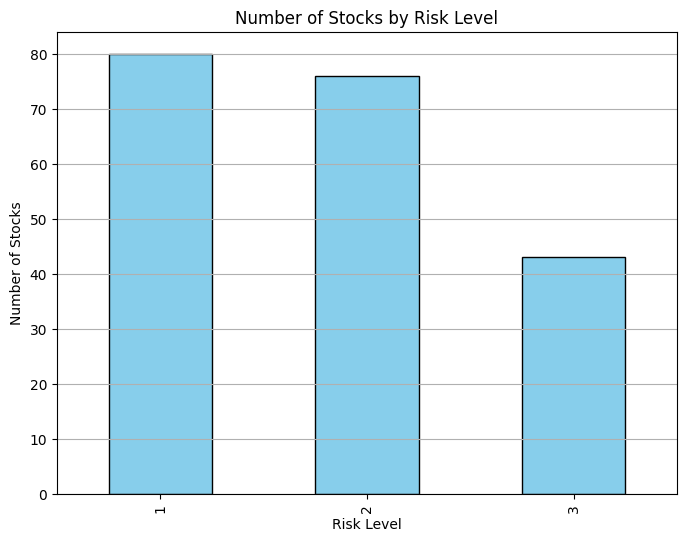

In [364]:
import matplotlib.pyplot as plt
risk_level_counts = df_groundtruth['Risk Level'].value_counts().sort_index()


plt.figure(figsize=(8, 6))
risk_level_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Risk Level')
plt.ylabel('Number of Stocks')
plt.title('Number of Stocks by Risk Level')

# Show the plot
plt.grid(axis='y')
plt.show()

In [365]:
# Calculate statistics
mean_value = df_groundtruth['Risk Level'].mean()
median_value = df_groundtruth['Risk Level'].median()
range_value = df_groundtruth['Risk Level'].max() - df_groundtruth['Risk Level'].min()
std_dev = df_groundtruth['Risk Level'].std()

# Print the results
print(f"Mean: {mean_value}")
print(f"Median: {median_value}")
print(f"Range: {range_value}")
print(f"Standard Deviation: {std_dev}")

Mean: 1.814070351758794
Median: 2.0
Range: 2
Standard Deviation: 0.7658117862734487


divide data using quatiles

In [357]:
# Assuming df_cleaned contains the 'Risk Level' data
quartiles = df_groundtruth['Risk Level'].quantile([0.25, 0.5, 0.75])

q1 = quartiles[0.25]  # 25th percentile (Q1)
q2 = quartiles[0.5]   # 50th percentile (Q2), also the median
q3 = quartiles[0.75]  # 75th percentile (Q3)

# Print the quartile ranges
print(f"Q1 (25th percentile): {q1}")
print(f"Q2 (50th percentile, Median): {q2}")
print(f"Q3 (75th percentile): {q3}")

# Define the ranges for each group
group_1_range = f"{df_groundtruth['Risk Level'].min()} to {q1}"
group_2_range = f"{q1} to {q2}"
group_3_range = f"{q2} to {q3}"
group_4_range = f"{q3} to {df_groundtruth['Risk Level'].max()}"

print(f"Group 1: {group_1_range}")
print(f"Group 2: {group_2_range}")
print(f"Group 3: {group_3_range}")
print(f"Group 4: {group_4_range}")


Q1 (25th percentile): 1.7055991657354546
Q2 (50th percentile, Median): 2.1858350218972236
Q3 (75th percentile): 2.8771888769175304
Group 1: 0.9928136296323319 to 1.7055991657354546
Group 2: 1.7055991657354546 to 2.1858350218972236
Group 3: 2.1858350218972236 to 2.8771888769175304
Group 4: 2.8771888769175304 to 7.7781709429727774


## train model: Decision Tree

In [366]:
X = df_main_cleaned.set_index('Stock Name')
y = df_groundtruth.set_index('Stock Name').loc[X.index]

In [367]:
print(X.shape)
print(y.shape)

(189, 13)
(189, 1)


In [368]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

y_pred = clf.fit(X_train, y_train).predict(X_test)
# print(X_test.shape)

# predict train data
pred_train = clf.predict(X_train)
pred_test = clf.predict(X_test)

In [369]:
pred_train

array([2, 2, 2, 1, 2, 2, 2, 1, 3, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1,
       1, 2, 3, 1, 2, 2, 1, 2, 1, 2, 1, 3, 1, 3, 2, 2, 2, 1, 2, 2, 1, 2,
       3, 1, 3, 2, 2, 1, 2, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2,
       3, 1, 2, 3, 1, 1, 3, 1, 3, 2, 1, 1, 1, 2, 1, 1, 2, 3, 2, 1, 2, 2,
       2, 3, 2, 3, 2, 3, 3, 1, 1, 3, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1,
       2, 3, 1, 1, 2, 1, 1, 2, 2, 3, 1, 1, 2, 1, 1, 1, 3, 1, 2, 1, 1, 2,
       1, 3, 3, 3, 1, 1, 2, 1, 2])

In [370]:
pred_test

array([3, 1, 3, 2, 2, 2, 1, 1, 1, 3, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2,
       1, 2, 3, 2, 1, 1, 1, 3, 3, 3, 1, 2, 1, 1, 1, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1])

### Accuracy

In [371]:
from sklearn.metrics import accuracy_score

train_acc = accuracy_score(y.loc[X_train.index], pred_train)
test_acc = accuracy_score(y.loc[X_test.index], pred_test)

print(train_acc)
print(test_acc)


1.0
0.375


## Random Forrest Classifier

In [372]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=2, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

y_pred = clf.fit(X_train, y_train).predict(X_test)
# print(X_test.shape)

# predict train data
pred_train = clf.predict(X_train)
pred_test = clf.predict(X_test)

/var/folders/tj/53pl_5hx6rl3m0g7pzmbp0580000gn/T/ipykernel_55697/2060097178.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  y_pred = clf.fit(X_train, y_train).predict(X_test)


Accuracy

In [373]:
from sklearn.metrics import accuracy_score

train_acc = accuracy_score(y.loc[X_train.index], pred_train)
test_acc = accuracy_score(y.loc[X_test.index], pred_test)

print(train_acc)
print(test_acc)

0.6808510638297872
0.4166666666666667


# Note

In [ ]:
msft = yf.Ticker("MSFT")

# get all stock info
msft.info

# get historical market data
hist = msft.history(period="1mo")

# show meta information about the history (requires history() to be called first)
msft.history_metadata

# show actions (dividends, splits, capital gains)
msft.actions
msft.dividends
msft.splits
msft.capital_gains  # only for mutual funds & etfs

# show share count
msft.get_shares_full(start="2022-01-01", end=None)

# show financials:
msft.calendar
msft.sec_filings
# - income statement
msft.income_stmt
msft.quarterly_income_stmt
# - balance sheet
msft.balance_sheet
msft.quarterly_balance_sheet
# - cash flow statement
msft.cashflow
msft.quarterly_cashflow
# see `Ticker.get_income_stmt()` for more options

# show holders
msft.major_holders
msft.institutional_holders
msft.mutualfund_holders
msft.insider_transactions
msft.insider_purchases
msft.insider_roster_holders

msft.sustainability

# show recommendations
msft.recommendations
msft.recommendations_summary
msft.upgrades_downgrades

# show analysts data
msft.analyst_price_targets
msft.earnings_estimate
msft.revenue_estimate
msft.earnings_history
msft.eps_trend
msft.eps_revisions
msft.growth_estimates

# Show future and historic earnings dates, returns at most next 4 quarters and last 8 quarters by default.
# Note: If more are needed use msft.get_earnings_dates(limit=XX) with increased limit argument.
msft.earnings_dates

# show ISIN code - *experimental*
# ISIN = International Securities Identification Number
msft.isin

# show options expirations
msft.options

# show news
msft.news   #----> can llm to create another asset

# get option chain for specific expiration
opt = msft.option_chain('YYYY-MM-DD')
# data available via: opt.calls, opt.puts